In [ ]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def quicksort_non_random_mid(arr):
    """ Quicksort with a non-random pivot (always selecting the mid element). """
    if len(arr) <= 1:
        return arr
    mid_index = len(arr) // 2
    pivot = arr[mid_index]
    left = [x for x in arr[:-1] if x <= pivot]
    right = [x for x in arr[:-1] if x > pivot]
    return quicksort_non_random_mid(left) + [pivot] + quicksort_non_random_mid(right)

def quicksort_non_random_last(arr):
    """ Quicksort with a non-random pivot (always selecting the last element). """
    if len(arr) <= 1:
        return arr
    pivot = arr[-1]
    left = [x for x in arr[:-1] if x <= pivot]
    right = [x for x in arr[:-1] if x > pivot]
    return quicksort_non_random_last(left) + [pivot] + quicksort_non_random_last(right)

def quicksort_random(arr):
    """ Quicksort with a random pivot. """
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort_random(left) + mid + quicksort_random(right)

In [ ]:
def benchmark_quicksort(quicksort_fn, arr_sizes, case):
    """Benchmark function for quicksort implementations with better case selection."""
    times = []

    for n in arr_sizes:
        if case == 'sorted':
            arr = list(range(n))

        elif case == 'random':
            arr = np.random.randint(0, 100000, n).tolist()

        else:
            print("Invalid case type")
            return


        start_time = time.time()
        quicksort_fn(arr)
        times.append(time.time() - start_time)

    return times

In [ ]:
def benchmark_quicksort(quicksort_fn, arr_sizes, case, num_trials=5):
    """Benchmark function for quicksort implementations with multiple trials."""
    avg_times = []

    for n in arr_sizes:
        total_time = 0

        for _ in range(num_trials):  # 多次实验取平均值
            if case == 'sorted':
                arr = list(range(n))

            elif case == 'random':
                arr = np.random.randint(0, 100000, n).tolist()

            else:
                print("Invalid case type")
                return

            start_time = time.time()
            quicksort_fn(arr)
            total_time += time.time() - start_time

        avg_times.append(total_time / num_trials)  # 计算平均时间

    return avg_times

In [ ]:
import sys
sys.getrecursionlimit()

1000

In [ ]:
sys.setrecursionlimit(10000)

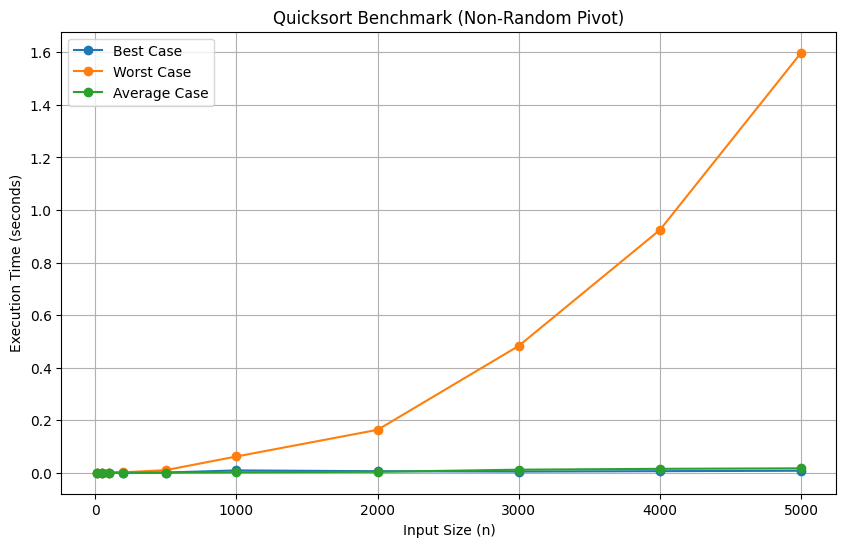

In [ ]:
# Define input sizes
input_sizes = [10, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]

# Run benchmarks for non-random pivot version
best_case_times = benchmark_quicksort(quicksort_non_random_mid, input_sizes, 'sorted', 1)
worst_case_times = benchmark_quicksort(quicksort_non_random_last, input_sizes, 'sorted', 1)
average_case_times = benchmark_quicksort(quicksort_non_random_last, input_sizes, 'random', 10)

# Plot the benchmark results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, best_case_times, label='Best Case', marker='o')
plt.plot(input_sizes, worst_case_times, label='Worst Case', marker='o')
plt.plot(input_sizes, average_case_times, label='Average Case', marker='o')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Quicksort Benchmark (Non-Random Pivot)')
plt.legend()
plt.grid()
plt.show()

## Mathematical Derivation of Average Runtime Complexity of Non-Random Pivot Quicksort

### **1. Recurrence Relation**
Quicksort with a non-random pivot (choosing the last element) partitions an array into two subarrays of approximately equal size on average. The recurrence relation for its runtime is:

$$
T(n) = T\left(\frac{n}{2}\right) + T\left(\frac{n}{2}\right) + O(n)
$$

which simplifies to:

$$
T(n) = 2T\left(\frac{n}{2}\right) + O(n)
$$

### **2. Expansion of the Recurrence Relation**
Expanding this recurrence:

$$
T(n) = 2 \left( 2T\left(\frac{n}{4}\right) + O\left(\frac{n}{2}\right) \right) + O(n)
$$

$$
= 4T\left(\frac{n}{4}\right) + O(n) + O(n)
$$

Repeating this expansion \( \log_2 n \) times until the base case (\( T(1) = O(1) \)):

$$
T(n) = 2^k T\left(\frac{n}{2^k}\right) + k O(n)
$$

For \( k = \log_2 n \), we get:

$$
T(n) = O(n \log n)
$$

### **3. Conclusion**
Thus, the average-case time complexity of Quicksort (with a non-random pivot) is:

$$
O(n \log n)
$$

This holds as long as the pivot divides the array into reasonably balanced partitions.
